# COVID19 evolution analysis

#### data loading

In [17]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tools
import plotly.express as px

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
df_naz = pd.read_csv('../dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv').drop('stato',1)
reg = pd.read_csv('../dati-regioni/dpc-covid19-ita-regioni.csv')
prov = pd.read_csv('../dati-province/dpc-covid19-ita-province.csv').drop('stato',1)
df_world_confirmed = pd.read_csv('../JohnHopkins_repo/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_world_deaths = pd.read_csv('../JohnHopkins_repo/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_world_recovered = pd.read_csv('../JohnHopkins_repo/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_naz = tools.add_extra_features(df_naz)
regions = reg.groupby('denominazione_regione')
df_reg = {}
for item in regions.groups:
    df_reg[item] = tools.add_extra_features(regions.get_group(item)).replace((np.inf, np.nan), 0)
provinces = prov.groupby('sigla_provincia')
df_prov = pd.DataFrame()
for item in provinces.groups:
    df_prov = pd.concat((df_prov,tools.add_extra_features(provinces.get_group(item)).replace((np.inf, np.nan), 0)),0)

In [19]:
df_prov[df_prov.index==df_prov.index.max()]

,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,delta_totale_casi,%delta_totale_casi,growth_factor
data,,,,,,,,,,,
03/16/2020,19,Sicilia,84,Agrigento,AG,37.309711,13.584575,22,2.0,0.100000,0.666667
03/16/2020,1,Piemonte,6,Alessandria,AL,44.912974,8.615401,273,66.0,0.318841,2.640000
03/16/2020,11,Marche,42,Ancona,AN,43.616760,13.518875,323,56.0,0.209738,1.076923
03/16/2020,2,Valle d'Aosta,7,Aosta,AO,45.737503,7.320149,105,48.0,0.842105,3.200000
03/16/2020,11,Marche,44,Ascoli Piceno,AP,42.853223,13.576911,21,7.0,0.500000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
03/16/2020,5,Veneto,27,Venezia,VE,45.434905,12.338452,356,28.0,0.085366,0.608696
03/16/2020,5,Veneto,24,Vicenza,VI,45.547497,11.545971,287,52.0,0.221277,0.732394
03/16/2020,5,Veneto,23,Verona,VR,45.438390,10.993527,425,90.0,0.268657,1.500000


## Italy

### diffusion heatmap for provinces

In [20]:
prov.groupby('data').get_group('2020-03-15 17:00:00')

,data,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
2560,2020-03-15 17:00:00,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,30
2561,2020-03-15 17:00:00,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,15
2562,2020-03-15 17:00:00,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,82
2563,2020-03-15 17:00:00,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,10
2564,2020-03-15 17:00:00,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...
2683,2020-03-15 17:00:00,5,Veneto,26,Treviso,TV,45.667546,12.245074,413
2684,2020-03-15 17:00:00,5,Veneto,27,Venezia,VE,45.434905,12.338452,328
2685,2020-03-15 17:00:00,5,Veneto,23,Verona,VR,45.438390,10.993527,335
2686,2020-03-15 17:00:00,5,Veneto,24,Vicenza,VI,45.547497,11.545971,235


In [21]:
col = 'totale_casi'
fig = px.density_mapbox(prov.groupby('data').get_group('2020-03-15 17:00:00'), 
                        lat='lat', lon='long', z=col, radius=10, 
                        hover_name='denominazione_provincia',
                        zoom=5,  height=800,
                        #animation_frame=df_prov.index,
                        mapbox_style="stamen-terrain",
                        title = col)
fig.show()

In [22]:
col = '%delta_totale_casi'
fig = px.density_mapbox(df_prov[df_prov.index==df_prov.index.max()], 
                        lat='lat', lon='long', z=col, radius=10, 
                        hover_name='denominazione_provincia',
                        zoom=5,  height=800,
                        #animation_frame=df_prov.index,
                        mapbox_style="stamen-terrain",
                        title = col)
fig.show()

### National evolution

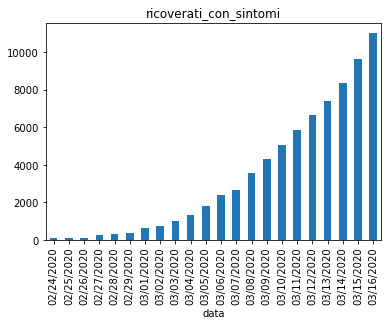

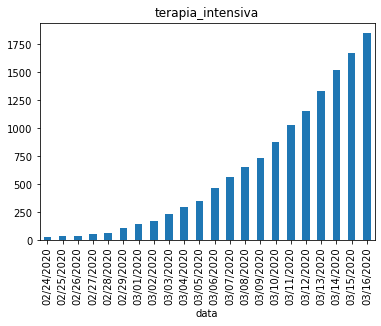

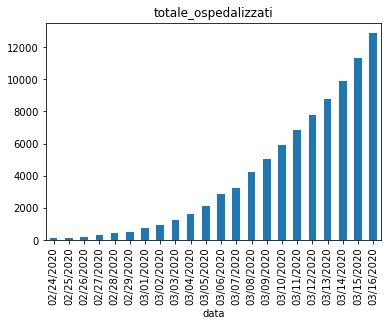

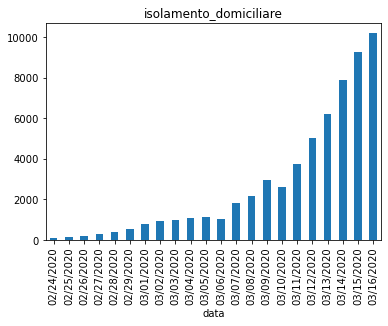

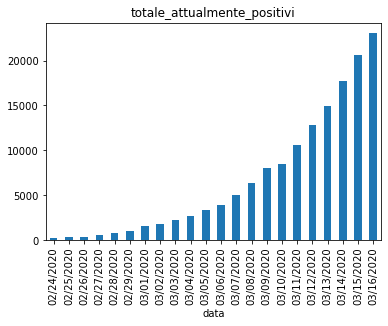

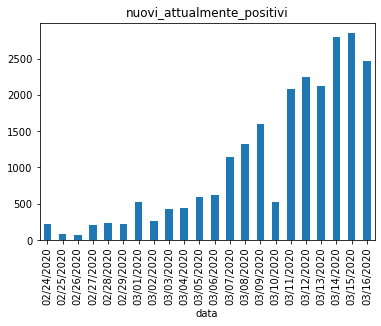

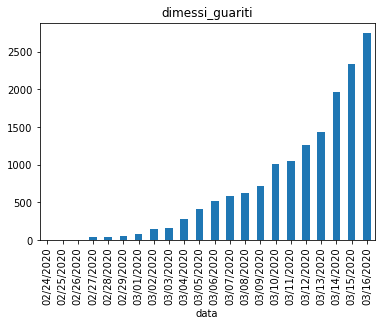

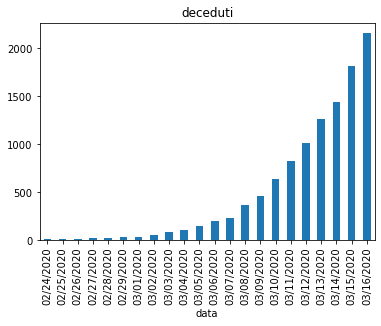

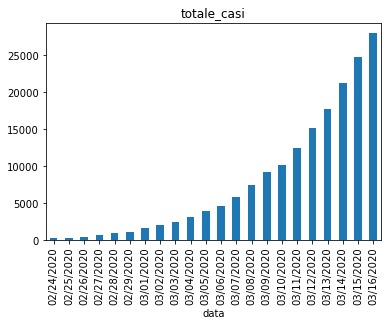

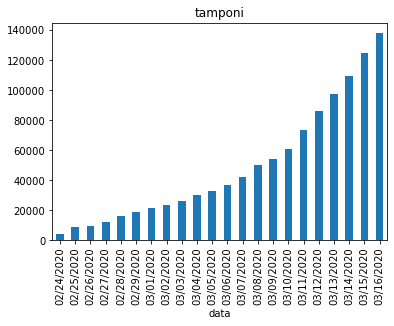

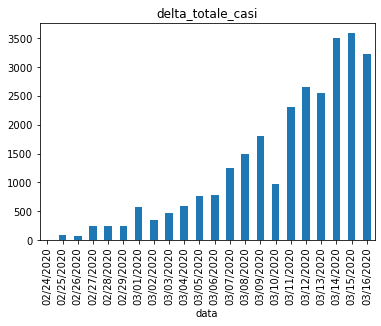

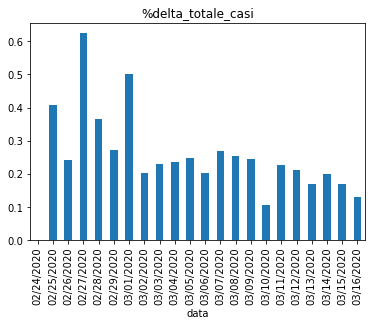

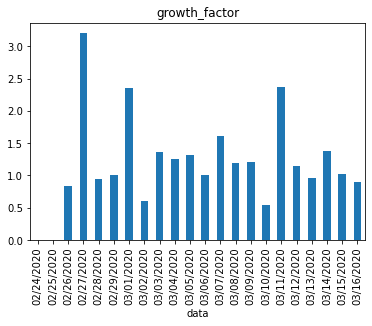

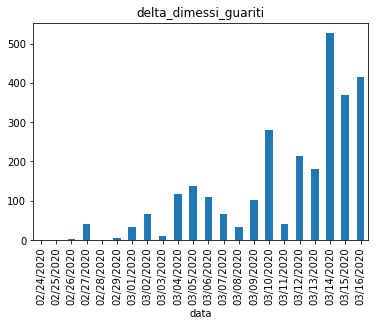

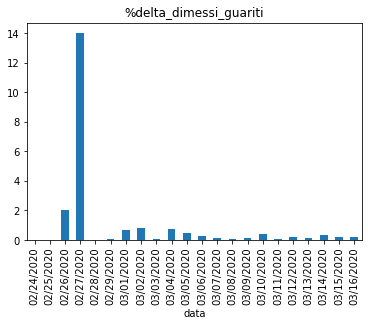

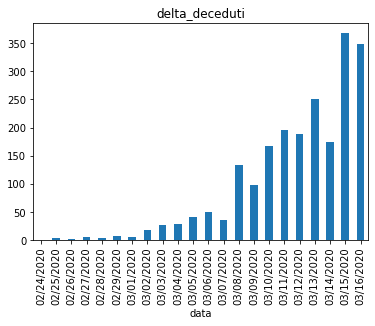

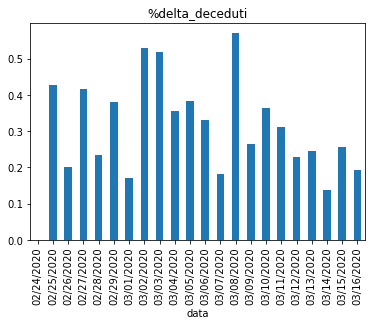

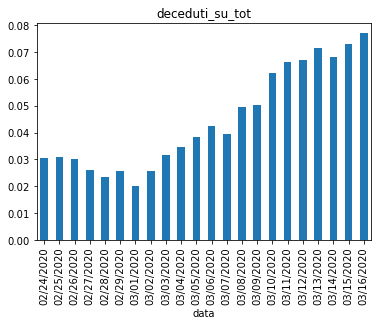

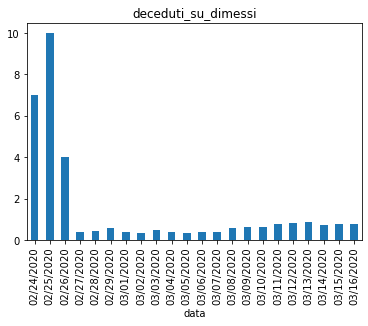

In [23]:
for col in df_naz.columns:
    plt.figure()
    df_naz[col].plot(kind='bar', title=col)    

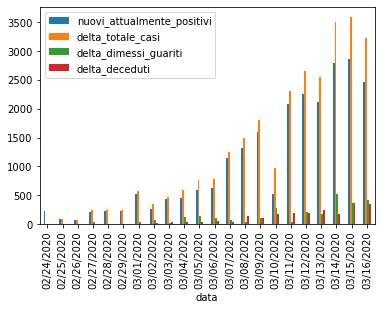

In [25]:
df_naz[['nuovi_attualmente_positivi', 'delta_totale_casi','delta_dimessi_guariti','delta_deceduti']].plot(kind='bar')

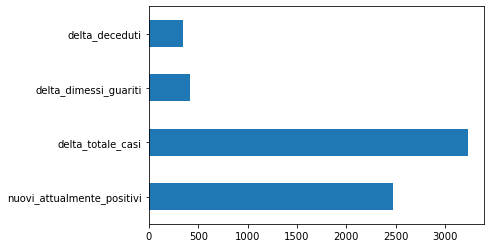

In [26]:
df_naz[['nuovi_attualmente_positivi', 'delta_totale_casi','delta_dimessi_guariti','delta_deceduti']].iloc[-1].plot(kind='barh')

Text(0.5, 1.0, "variazione giornaliera nuovi casi per l'Abruzzo")

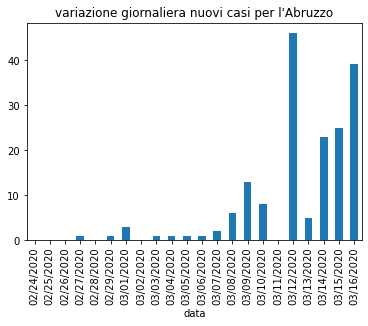

In [33]:
df_reg['Abruzzo']['delta_totale_casi'].plot(kind='bar')
plt.title("variazione giornaliera nuovi casi per l'Abruzzo")

C:\Anaconda3\envs\weiszbot\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Maurizio Spadaccino\Documents\projects\COVID-19\notebooks\tools.py:18: RuntimeWarning:

invalid value encountered in power

C:\Users\Maurizio Spadaccino\Documents\projects\COVID-19\notebooks\tools.py:18: RuntimeWarning:

divide by zero encountered in true_divide



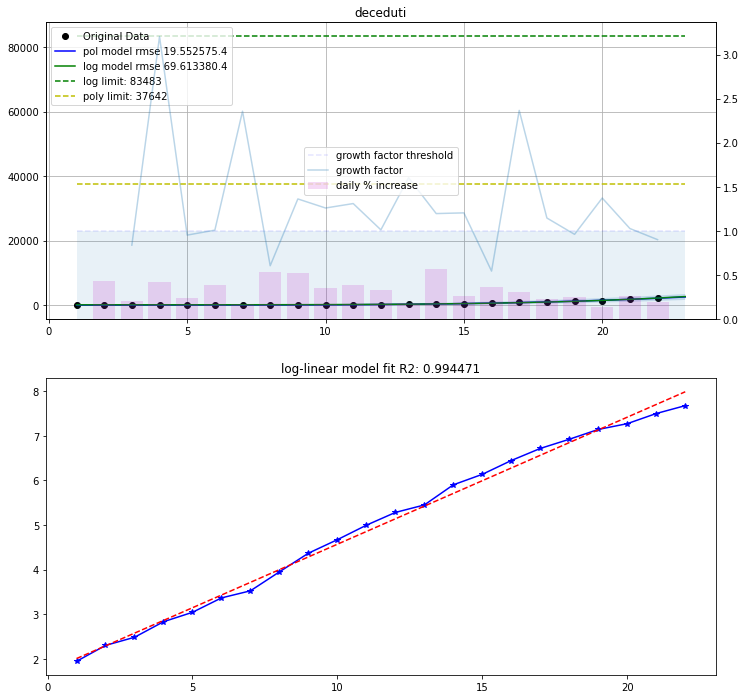

next day prediction for log model:  2661
next day prediction for pol model:  2534
data
03/12/2020    1016
03/13/2020    1266
03/14/2020    1441
03/15/2020    1809
03/16/2020    2158
Name: deceduti, dtype: int64


In [34]:
tools.plot_model(df_naz.replace(0,0.01), 'deceduti', backward_fit=0, forward_look=1, showlimit=True)

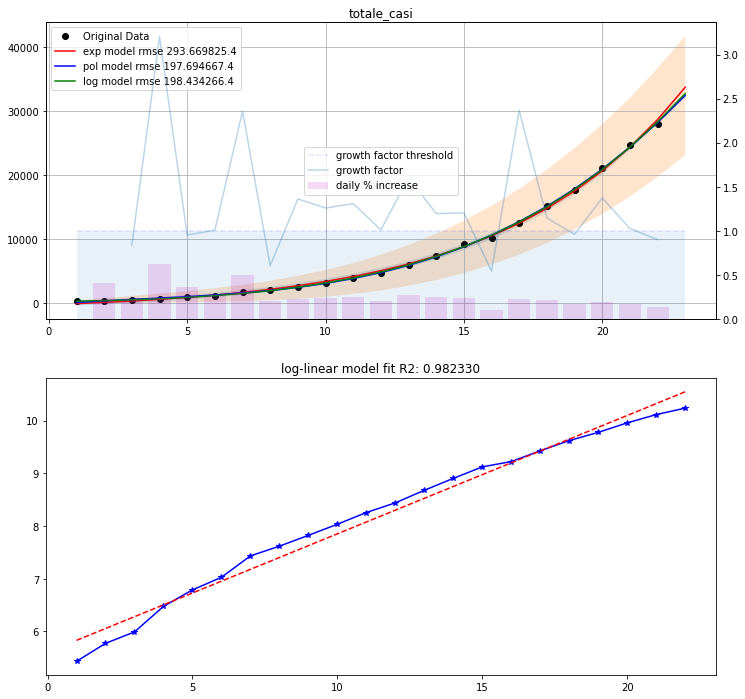

next day prediction for log model:  32772
next day prediction for exp model:  33762
next day prediction for pol model:  32470
data
03/12/2020    15113
03/13/2020    17660
03/14/2020    21157
03/15/2020    24747
03/16/2020    27980
Name: totale_casi, dtype: int64


In [32]:
tools.plot_model(df_naz.replace(0,0.01), 'totale_casi', backward_fit=0, forward_look=1, showlimit=False)